# CIS 443-01 - Analytics Programming
## Program 4
__Worth__: 100 pts.<br />
__Purpose__: Use a SKLearn to build an analytic model for categorical data

### Directions
In the code cell below, write Python code to accomplish the following using what you've learned through the semester. 


#### Part 1

Your code should use the preloaded data set to build a logistic regression model. Perform a training and testing split of this data before you create this model./ 

Once you have created this model, obtain all coefficients created by the model. 

Explain each of the two sets of coefficients, and what they mean. 

Score your model against the testing dataset, and explain when the score returned represents. 

In [8]:
#Provided Code
import pandas as pd

add_df = pd.read_csv('social_ads.csv')

x_data = add_df[['Age','EstimatedSalary']].values.reshape(-1, 2)
y_target = add_df.Purchased.values

In [29]:
# Put Program 4 Code Here. Do not create any additional code blocks or points may be deducted. 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(x_data, y_target, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(x_train, y_train)

intercept = model.intercept_
coefficients = model.coef_

y_pred = model.predict(x_test)
score = accuracy_score(y_test, y_pred)

print("Intercept:", intercept)
print("Feature coefficients:", coefficients)
#The first coefficient relates to age and the second is the estimated salary. 
#They mean that for every increase in age the odds increase by 0.208 that they will make a purchase. 
#The estimated salary is such a small number that it is not seen as significant to the model.
print("Accuracy score:", score)
#The score is a percentage of how correct the model is. The model is 88% correct or it was off by 12%

Intercept: [-11.40367505]
Feature coefficients: [[2.07808219e-01 3.54979001e-05]]
Accuracy score: 0.8875


#### Part 2

Use pandas and Matplotlib to create a confusion matrix of the scoring of your model. Because this is a Yes/No Questionaire, you can consider it a TP/TN/FP/FN matrix.



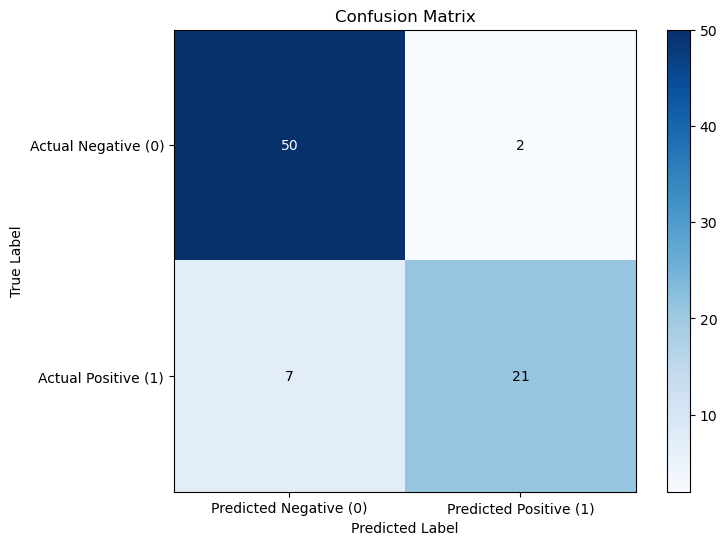

Confusion Matrix:
                      Predicted Negative (0)  Predicted Positive (1)
Actual Negative (0)                      50                       2
Actual Positive (1)                       7                      21


In [35]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd

y_pred = model.predict(x_test)

cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(
    cm, 
    index=['Actual Negative (0)', 'Actual Positive (1)'], 
    columns=['Predicted Negative (0)', 'Predicted Positive (1)']
)

plt.figure(figsize=(8, 6))
plt.title("Confusion Matrix")
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
plt.xticks(range(2), ['Predicted Negative (0)', 'Predicted Positive (1)'])
plt.yticks(range(2), ['Actual Negative (0)', 'Actual Positive (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > cm.max() / 2 else "black")

plt.show()
print("Confusion Matrix:\n", cm_df)


Be sure to save and exit your Jupyter Notebook and Shutdown Jupyter Lab (from the __File__ menu) before you submit your notebook on Blackboard for grading.